In [50]:
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata, interp2d
import scipy


In [51]:
def get_non_uniform_sampling(source, steps):
    shape = np.shape(source)
    y_centre = int(shape[0]/2)
    radius = int(shape[0]/2)
    
    pi = np.pi
    multiplier = 0.5
    x_coordinates = []
    y_coordinates = []

    for r in steps:
        number_of_points = (1/multiplier) * 2

        for j in range(int(number_of_points)):
            theta = j*pi*multiplier
            x = y_centre + (r * np.cos(theta))
            y = y_centre + (r * np.sin(theta))
            x_coordinates.append(int(x))
            y_coordinates.append(int(y))

        multiplier = multiplier/2
    
    return np.array(x_coordinates), np.array(y_coordinates)

(512, 512, 3)


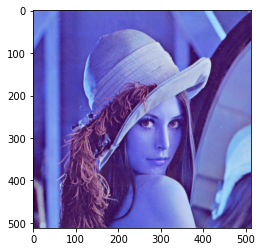

In [52]:
img = cv2.imread("/content/Lenna_(test_image) (1).png")
(B,G,R) = cv2.split(img)
print(np.shape(img))
plt.imshow(img)

In [53]:
steps = [1, 40, 100, 150, 175, 200, 230, 240, 245, 250]
x_coordinates, y_coordinates = get_non_uniform_sampling(G, steps)
number_of_points = (np.shape(x_coordinates))[0]
number_of_points

4092

In [54]:
w = 5
var = []
std = []
for i in range(number_of_points):
    half = int(w/2)
    x = x_coordinates[i]
    y = y_coordinates[i]
    l = int(x-half)
    r = int(x+half+1)
    d = int(y-half)
    u = int(y+half+1)
    grid = G[l:r, d:u]
    v = np.var(grid)
    var.append(v)
    std.append(math.sqrt(v))

In [55]:
print(std)

[18.622395119855017, 18.201362586356, 13.67309767389965, 16.15594008406815, 3.3718837465132157, 12.45690170146654, 13.026496075307435, 9.656831778590739, 26.262855899539943, 41.76609150974029, 28.643631054738854, 12.033686052078973, 6.505382386916237, 20.859530196051875, 5.788816804840174, 18.247454617014398, 10.330227490234666, 7.657049039936991, 3.0394736386420593, 9.00186647312656, 7.957285969474769, 13.801449199268895, 3.493078871139328, 11.743934604722558, 25.867353942759586, 26.7132925713024, 24.86816438742514, 23.139576487049197, 3.6, 5.304488665272083, 2.3664319132398464, 6.338958905056886, 8.942125027083886, 24.828241983676573, 4.058768286069063, 4.132602085853415, 29.156131430627077, 3.4465054765660827, 4.514155513493083, 27.692598289073562, 4.8, 31.09073173793116, 3.5340628177778615, 3.334666400106613, 9.361709245645264, 15.922009923373368, 12.933676971379795, 7.974559548965698, 4.923413450036469, 18.01839060515672, 6.899275324264136, 20.37080263514425, 3.8574603043971822, 2

In [56]:
final_var = np.empty(np.shape(G))
final_var[:,:] = np.nan
final_std = np.empty(np.shape(G))
final_std[:,:] = np.nan

for i in range(number_of_points):
    final_var[x_coordinates[i], y_coordinates[i]] = var[i]
    final_std[x_coordinates[i], y_coordinates[i]] = std[i]

In [57]:
std = np.array(std)


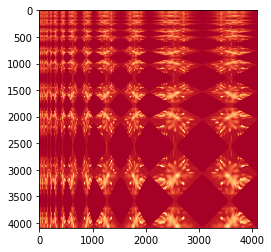

In [58]:
x_grid, y_grid = np.meshgrid(x_coordinates,y_coordinates)

# get known values to set the interpolator
# mask = [~np.isnan(std)]
# x = x_grid[mask].reshape(-1)
# y = y_grid[mask].reshape(-1)
# points = np.array([x,y]).T
points = []
for i , j in zip(x_coordinates, y_coordinates):
  points.append([i,j])

#print(std.shape)
interpolated_arr = scipy.interpolate.griddata(points, std, (x_grid, y_grid) , method='linear', fill_value=0, rescale=False)

plt.imshow(interpolated_arr, cmap = 'RdYlBu')

In [59]:
x_coordinates
final_std[257,]

array([        nan,         nan,         nan,         nan,         nan,
               nan,  4.13298923,         nan,         nan,         nan,
               nan,  4.2112231 ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [60]:
df = pd.DataFrame(final_var)
df[245]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
507   NaN
508   NaN
509   NaN
510   NaN
511   NaN
Name: 245, Length: 512, dtype: float64

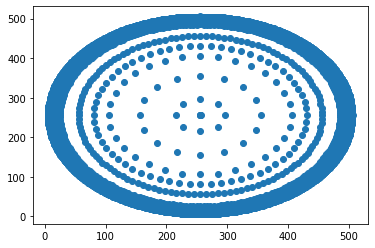

In [61]:
plt.scatter(x_coordinates, y_coordinates)

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
ax = plt.axes(projection ="3d")
ax.scatter3D(x_coordinates, y_coordinates, final_var)
plt.show()

In [ ]:
print(final_std.shape)
x_coordinates.shape

In [ ]:
print(final_var)

In [ ]:
df.interpolate(method='linear')
df

In [ ]:
df.interpolate(method='quadratic')
df